In [2]:
import pandas as pd
import numpy as np
import os
from pandasql import sqldf
from scipy import stats
import time
import networkx as nx
import simple_icd_10_cm as cm
import random
from string import ascii_letters
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Calculate Weighted Jaccard distance between models using different dataset sizes

comparison_dataset = "..." # Insert path to csv where each column contains RR values for models run on different datasets

comp_df = pd.read_csv(comparison_dataset)

first = '120k' # One column name
second = '250k' # Another column name to compare against the first

# Weighted Jaccard distance between the two models
1-np.sum(comp_df.apply(lambda row: min(row[first],row[second]),axis=1))/np.sum(comp_df.apply(lambda row: max(row[first],row[second]),axis=1))

In [ ]:
# Create comparison matrix for dataset with randomly shuffled rows

dataset = '...' # Insert path to csv containing RR values

RR_df = pd.read_csv(dataset)

# Shuffle random rows

RR_df2 = RR_df.copy(deep=True) # Create copy of dataframe
rows_to_shuffle = RR_df2.sample(frac=0.75) # Choose percentage of rows to shuffle
indexes = list(rows_to_shuffle.index.array) # Save indexes of these rows
shuffled_rows = rows_to_shuffle.sample(frac=1).reset_index(drop=True) # Shuffle rows
shuffled_rows = shuffled_rows.set_index([indexes]) # Relabel indexes
RR_df2.loc[RR_df2.RR.isin(shuffled_rows.RR),['RR']]=shuffled_rows[['RR']] # Insert shuffled rows into original dataframe
RR_df['Shuffled']=RR_df2['RR'] # Add shuffled column to original dataframe

# Calculate weighted Jaccard distance between original rows and shuffled rows

1-np.sum(RR_df.apply(lambda row: min(row['RR'],row['Shuffled']),axis=1))/np.sum(RR_df.apply(lambda row: max(row['RR'],row['Shuffled']),axis=1)) 

In [ ]:
# Construct comparison matrix visualisation

In [136]:
comp_matrix = "..." # Insert path to csv containing matrix comparing distances between models
df = pd.read_csv(comp_matrix, index_col = ' ')

df

,1k,10k,50k,120k,250k
,,,,,
1k,NaN,NaN,NaN,NaN,NaN
10k,0.42345,NaN,NaN,NaN,NaN
50k,0.40541,0.18502,NaN,NaN,NaN
120k,0.40101,0.17811,0.08938,NaN,NaN
250k,0.39894,0.17235,0.08271,0.05251,NaN


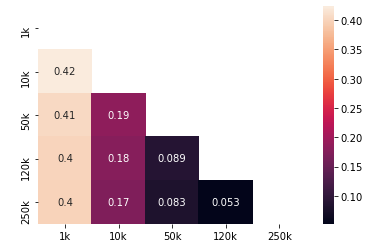

In [141]:
matrix_mask = np.triu(df) # Create mask so only get lower matrix
plot = sns.heatmap(df, annot=True, mask=matrix_mask)
fig = plot.get_figure()
# fig.savefig('ICD section correlations plot.jpg')